# Bank Marketing Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
df.shape

(31647, 18)

In [6]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [23]:
# Seperating numerical and categorical column

cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print("categorical columns:",cat_col)
print('=================================================')
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print("Numerical columns:",num_col)


categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [13]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [14]:
# column 'ID' has all unique values we can drop this column
df.drop('ID',axis=1,inplace = True)

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1.If mean is greater than median means data skewed to right As we can see above observation age,balance,duration feature has skewness.
2.If mean is less than median means data skewed to left.
day,pday feature has left skewness.
3.we can see the difference between values of column in 75% and maximum values that means outliers are present in columns.


In [16]:
df.describe(include='object').transpose()

,count,unique,top,freq
job,31647,12,blue-collar,6842
marital,31647,3,married,19095
education,31647,4,secondary,16224
default,31647,2,no,31062
housing,31647,2,yes,17584
loan,31647,2,no,26516
contact,31647,3,cellular,20423
month,31647,12,may,9669
poutcome,31647,4,unknown,25929
subscribed,31647,2,no,27932


no     27932
yes     3715
Name: subscribed, dtype: int64


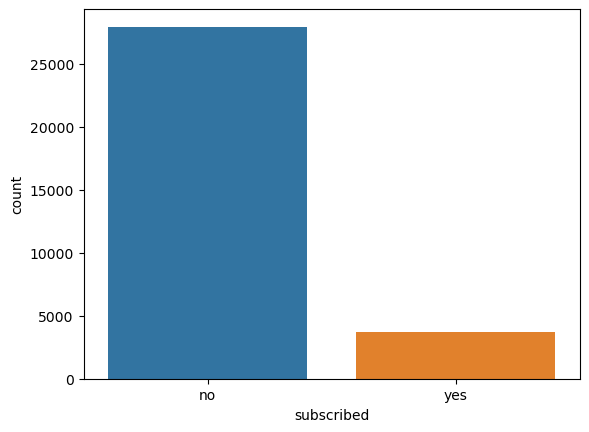

In [17]:
ax = sns.countplot(x='subscribed',data=df)
print(df['subscribed'].value_counts())

1.It is class imbalance problem(too high ,too low difference) which is only in classification part.


no     26516
yes     5131
Name: loan, dtype: int64


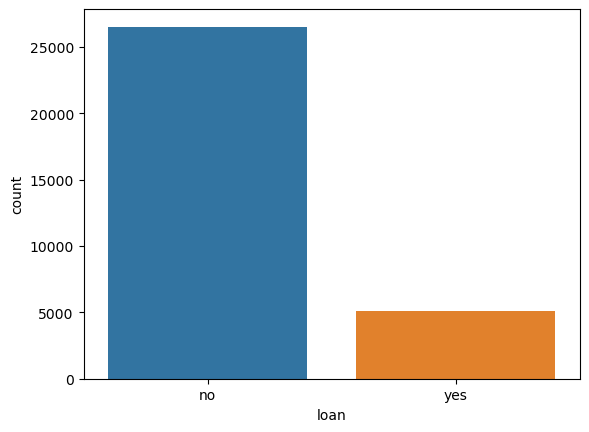

In [18]:
ax = sns.countplot(x='loan',data=df)
print(df['loan'].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


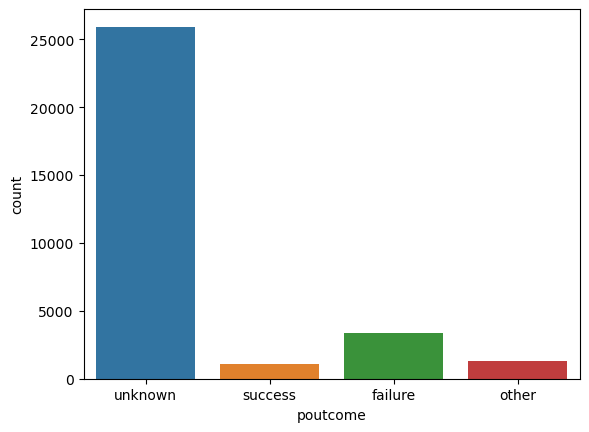

In [19]:
ax = sns.countplot(x='poutcome',data=df)
print(df['poutcome'].value_counts())

no     31062
yes      585
Name: default, dtype: int64


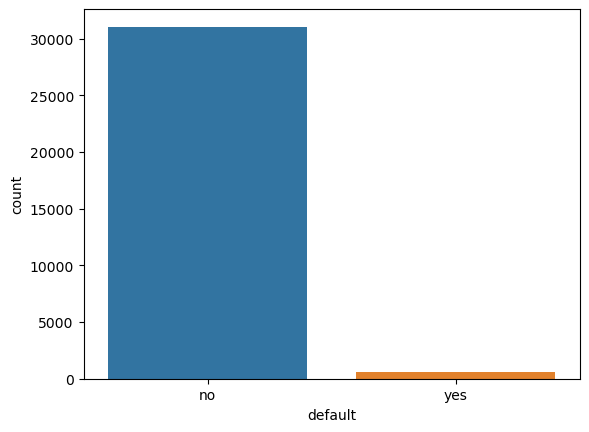

In [20]:
ax = sns.countplot(x='default',data=df)
print(df['default'].value_counts())

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


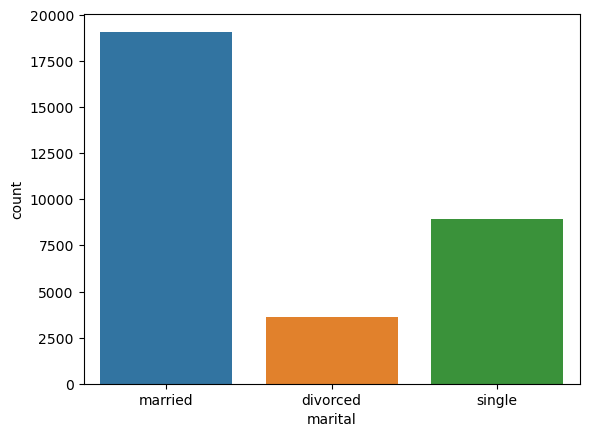

In [21]:
ax = sns.countplot(x='marital',data=df)
print(df['marital'].value_counts())

# Distribution Plot

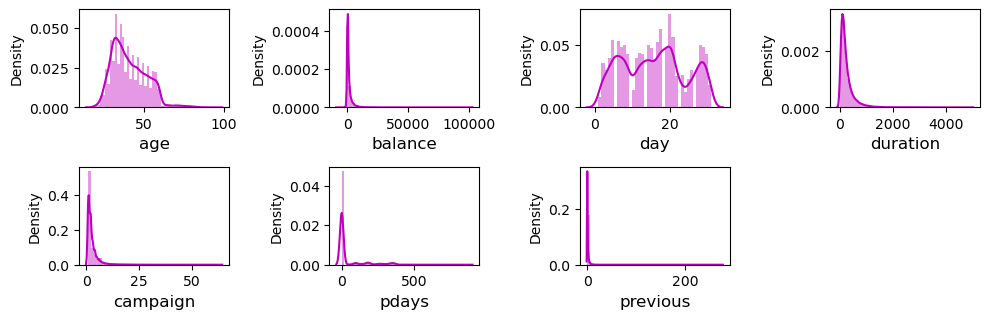

In [24]:
plt.figure(figsize = (10,6),facecolor = 'white')
plot = 1
for col in num_col:
    if plot<=8:
        ax = plt.subplot(4,4,plot)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation = 0,fontsize=10)
    plot+=1
plt.tight_layout()

1.from the above distribution plot we can notice that data looks normal   in 'age' and 'day'.
2.balance,duration,campaign ,pdays and previous these all features are skewed to right side.

# Multivariate Analysis

In [25]:
df.groupby(['subscribed','loan','job'])['job'].count()

subscribed  loan  job          
no          no    admin.           2506
                  blue-collar      5229
                  entrepreneur      701
                  housemaid         685
                  management       4868
                  retired          1007
                  self-employed     833
                  services         2114
                  student           445
                  technician       3859
                  unemployed        707
                  unknown           178
            yes   admin.            673
                  blue-collar      1124
                  entrepreneur      222
                  housemaid         110
                  management        848
                  retired           205
                  self-employed     150
                  services          535
                  student             8
                  technician        854
                  unemployed         69
                  unknown             2
yes     

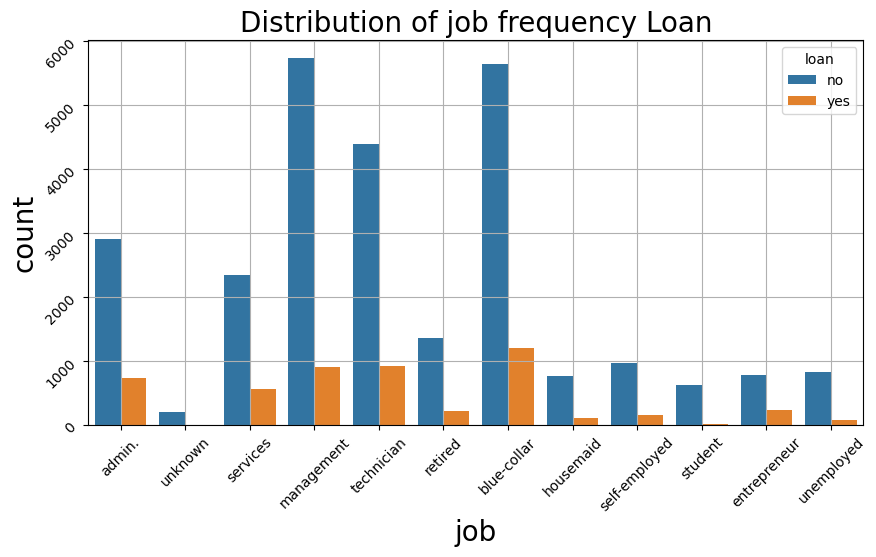

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='loan',data=df)
plt.grid(True)
plt.title('Distribution of job frequency Loan',fontsize=20)
plt.xlabel('job',fontsize =20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

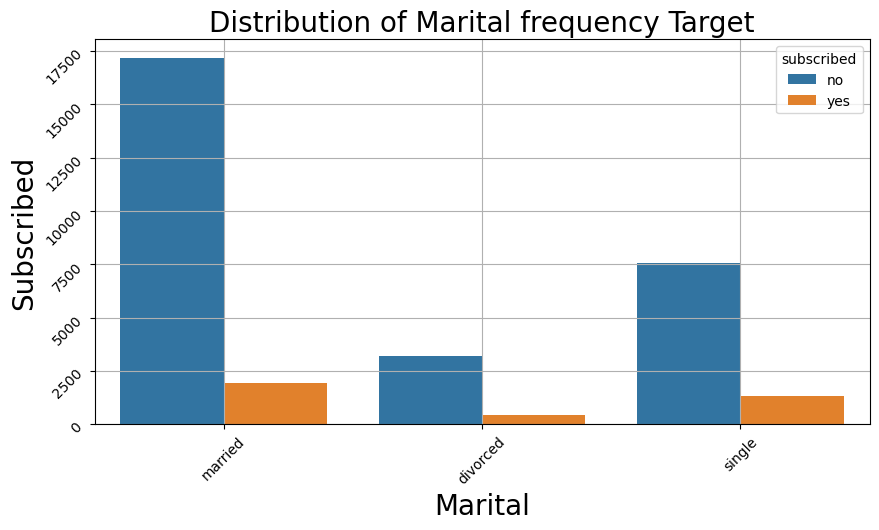

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',hue='subscribed',data=df)
plt.grid(True)
plt.title('Distribution of Marital frequency Target',fontsize=20)
plt.xlabel('Marital',fontsize =20)
plt.ylabel('Subscribed',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

1.From above plot we can see the distribution of married,divorced and single people who subscribed and who are not.
2.number of people who are not subscribed to term deposite are married.


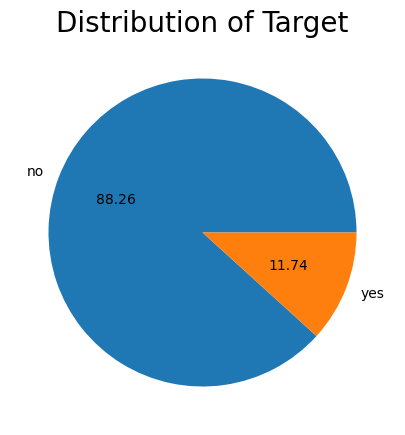

In [28]:
plt.figure(figsize=(10,5))
plt.pie(df.subscribed.value_counts(),labels=df.subscribed.value_counts().index,autopct='%.2f')
plt.title('Distribution of Target',fontsize=20)
plt.show()

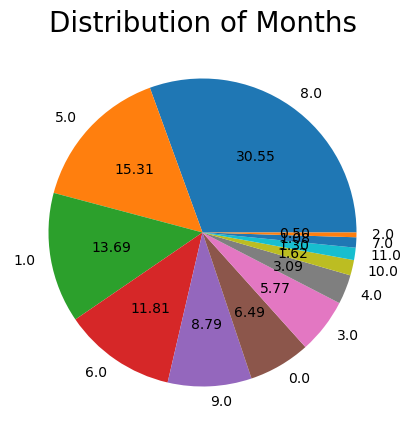

In [90]:
plt.figure(figsize=(10,5))
plt.pie(df.month.value_counts(),labels=df.month.value_counts().index,autopct='%.2f')
plt.title('Distribution of Months',fontsize=20)
plt.show()

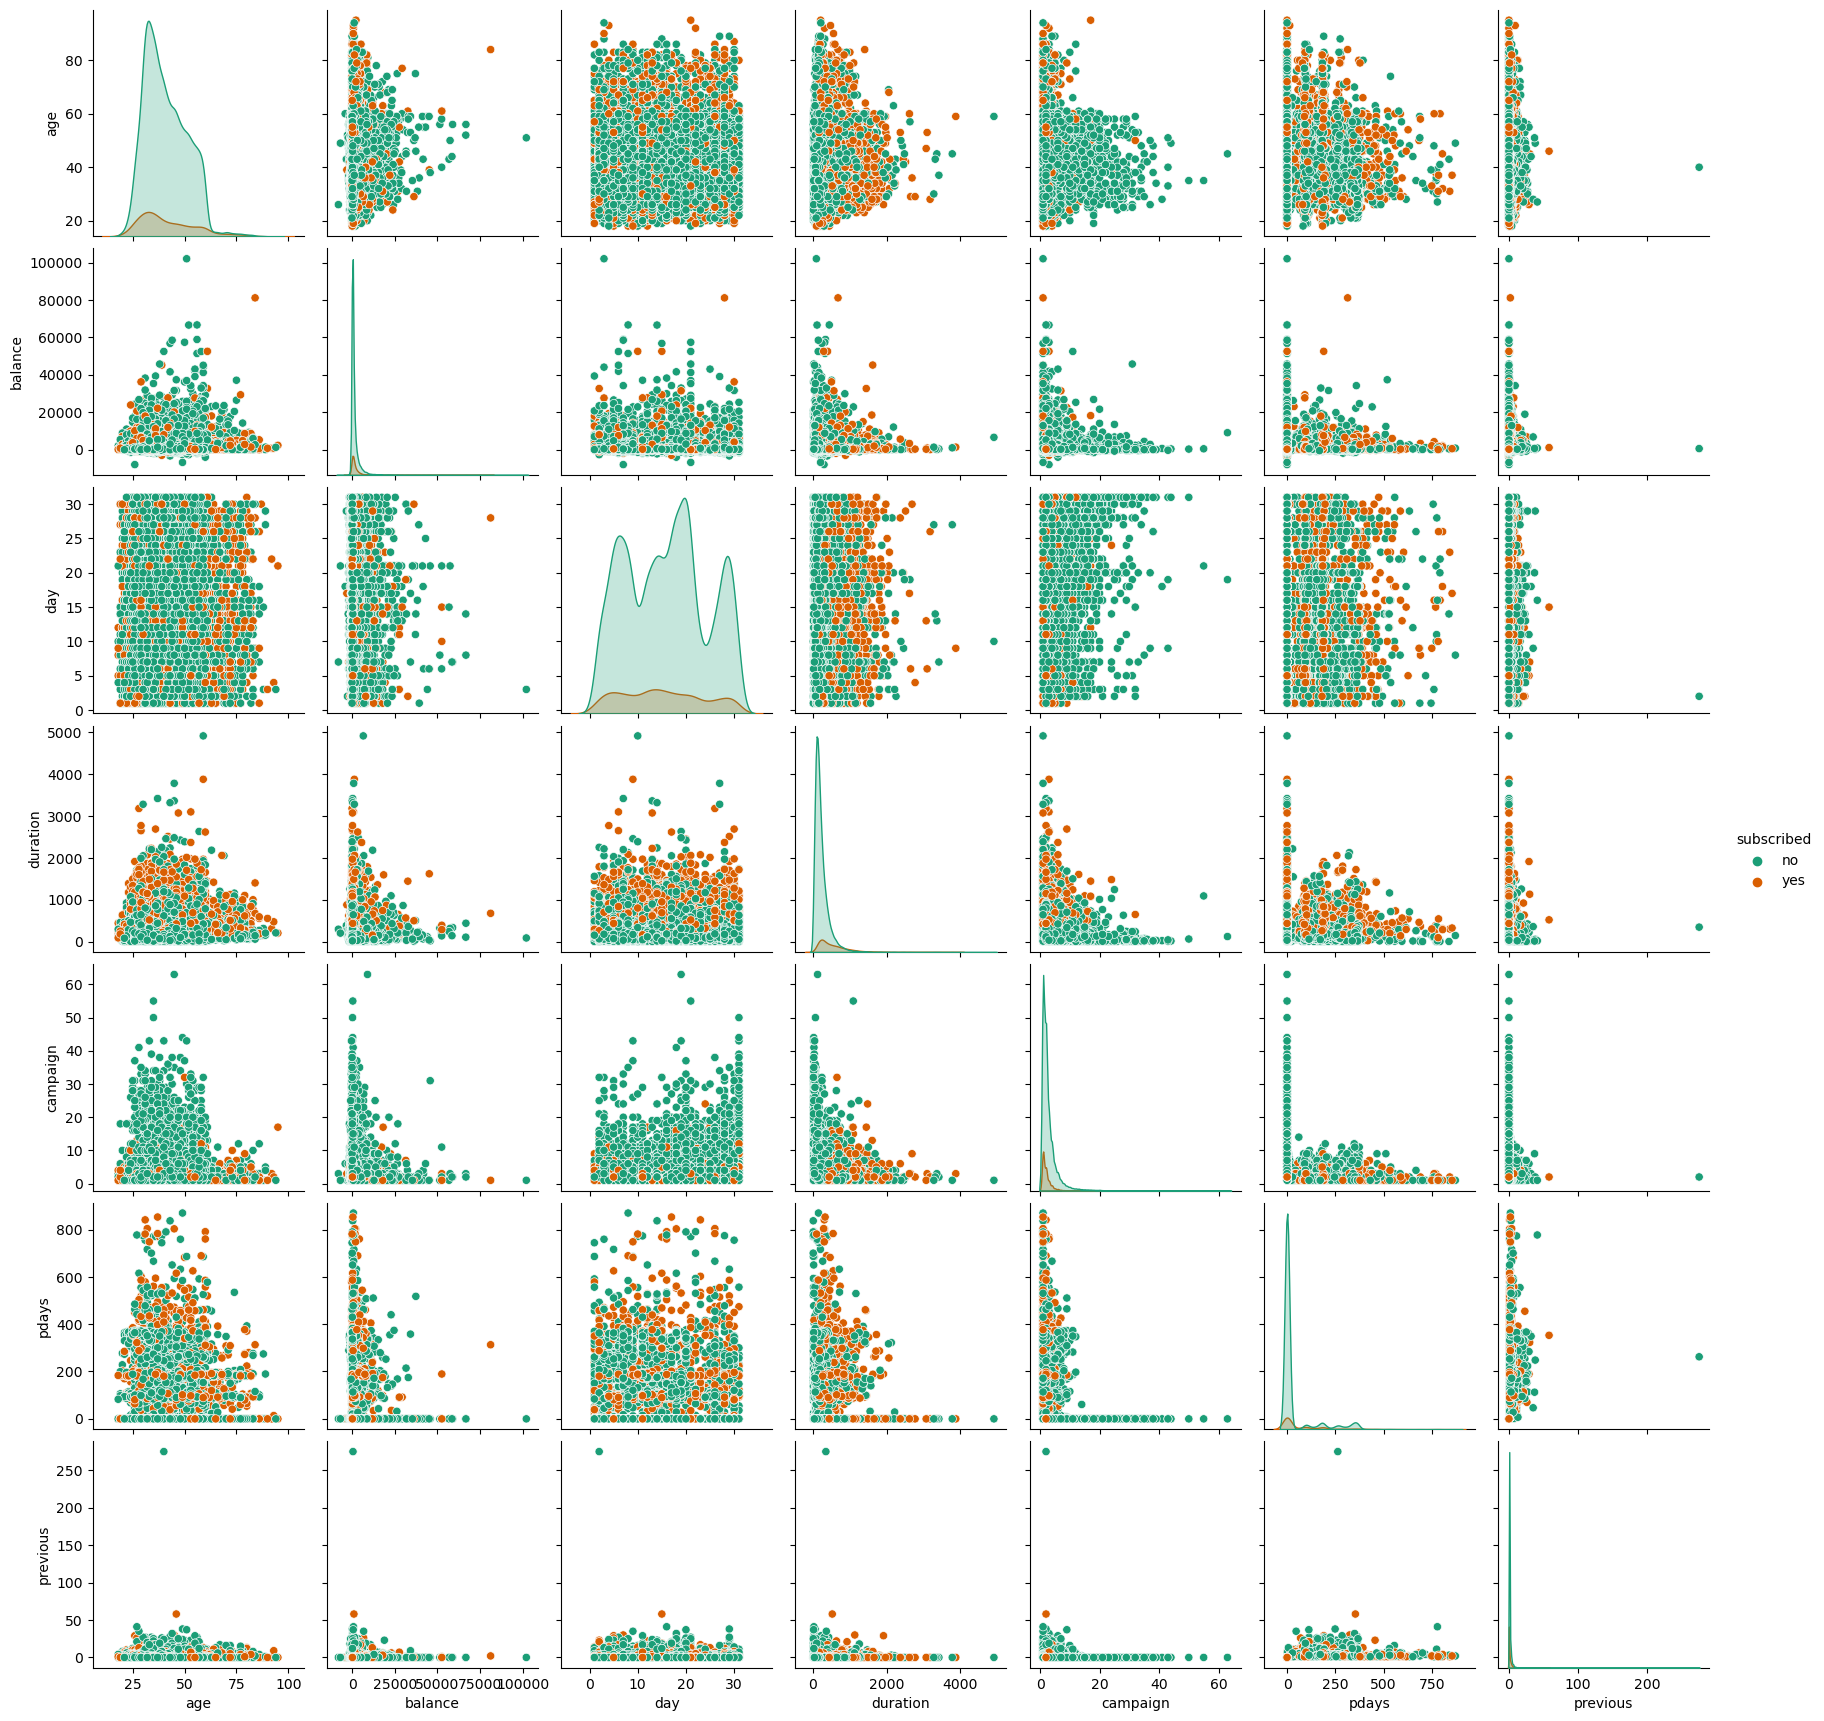

In [30]:
sns.pairplot(df,hue='subscribed',palette = 'Dark2')
plt.show()

# checking for skewness

In [31]:
df.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [32]:
#'previous' has so much skewness so we are going to drop this column 
df.drop('previous',axis=1,inplace=True)

In [33]:
df.skew()

age         0.681607
balance     7.995696
day         0.087185
duration    3.199766
campaign    4.873935
pdays       2.642374
dtype: float64

In [34]:
df['balance'] = np.cbrt(df['balance'])
df['balance']

0        12.456918
1         1.442250
2         9.622603
3        14.868480
4         4.918685
           ...    
31642     0.000000
31643     7.243156
31644     6.782423
31645     6.082202
31646     5.886765
Name: balance, Length: 31647, dtype: float64

In [35]:
df['campaign']=np.cbrt(df['campaign'])

In [36]:
df.skew()

age         0.681607
balance    -0.086014
day         0.087185
duration    3.199766
campaign    1.667938
pdays       2.642374
dtype: float64

Here we Removed skewness of columns.

# Encoding Categorical Columns

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [38]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,44,1.259921,-1,3.0,0.0
1,31,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,91,1.259921,-1,3.0,0.0
2,27,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,240,1.000000,-1,3.0,0.0
3,57,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,867,1.000000,84,2.0,1.0
4,31,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,380,1.000000,-1,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,116,1.259921,-1,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,438,1.259921,-1,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,6.782423,0.0,0.0,0.0,7,1.0,37,1.442250,-1,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,6.082202,1.0,0.0,1.0,15,8.0,22,1.912931,337,0.0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  float64
 2   marital     31647 non-null  float64
 3   education   31647 non-null  float64
 4   default     31647 non-null  float64
 5   balance     31647 non-null  float64
 6   housing     31647 non-null  float64
 7   loan        31647 non-null  float64
 8   contact     31647 non-null  float64
 9   day         31647 non-null  int64  
 10  month       31647 non-null  float64
 11  duration    31647 non-null  int64  
 12  campaign    31647 non-null  float64
 13  pdays       31647 non-null  int64  
 14  poutcome    31647 non-null  float64
 15  subscribed  31647 non-null  float64
dtypes: float64(12), int64(4)
memory usage: 3.9 MB


In [40]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,7.456890,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,1.304468,39.576042,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,6.598377,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,0.348530,99.317592,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-20.015821,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,4.179339,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,7.663094,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,1.259921,-1.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,11.268857,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,1.442250,-1.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,46.742671,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,3.979057,871.000000,3.000000,1.000000


# Correlation batween target variable and other features

In [41]:
cor = df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.102655,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.016974,-0.021947,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.030541,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.004734,-0.022552,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.029260,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.020674,0.019741,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.075759,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,-0.001402,-0.001566,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.198400,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018914,-0.029622,0.035067,-0.020168
balance,0.102655,0.030541,0.029260,0.075759,-0.198400,1.000000,-0.087058,-0.142789,-0.047563,-0.011106,-0.002360,0.038710,-0.035939,0.030144,-0.055961,0.097107
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.087058,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.033177,0.118790,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.142789,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.006838,-0.020078,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.047563,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.014552,-0.245076,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,-0.011106,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.164516,-0.087626,0.077586,-0.029600


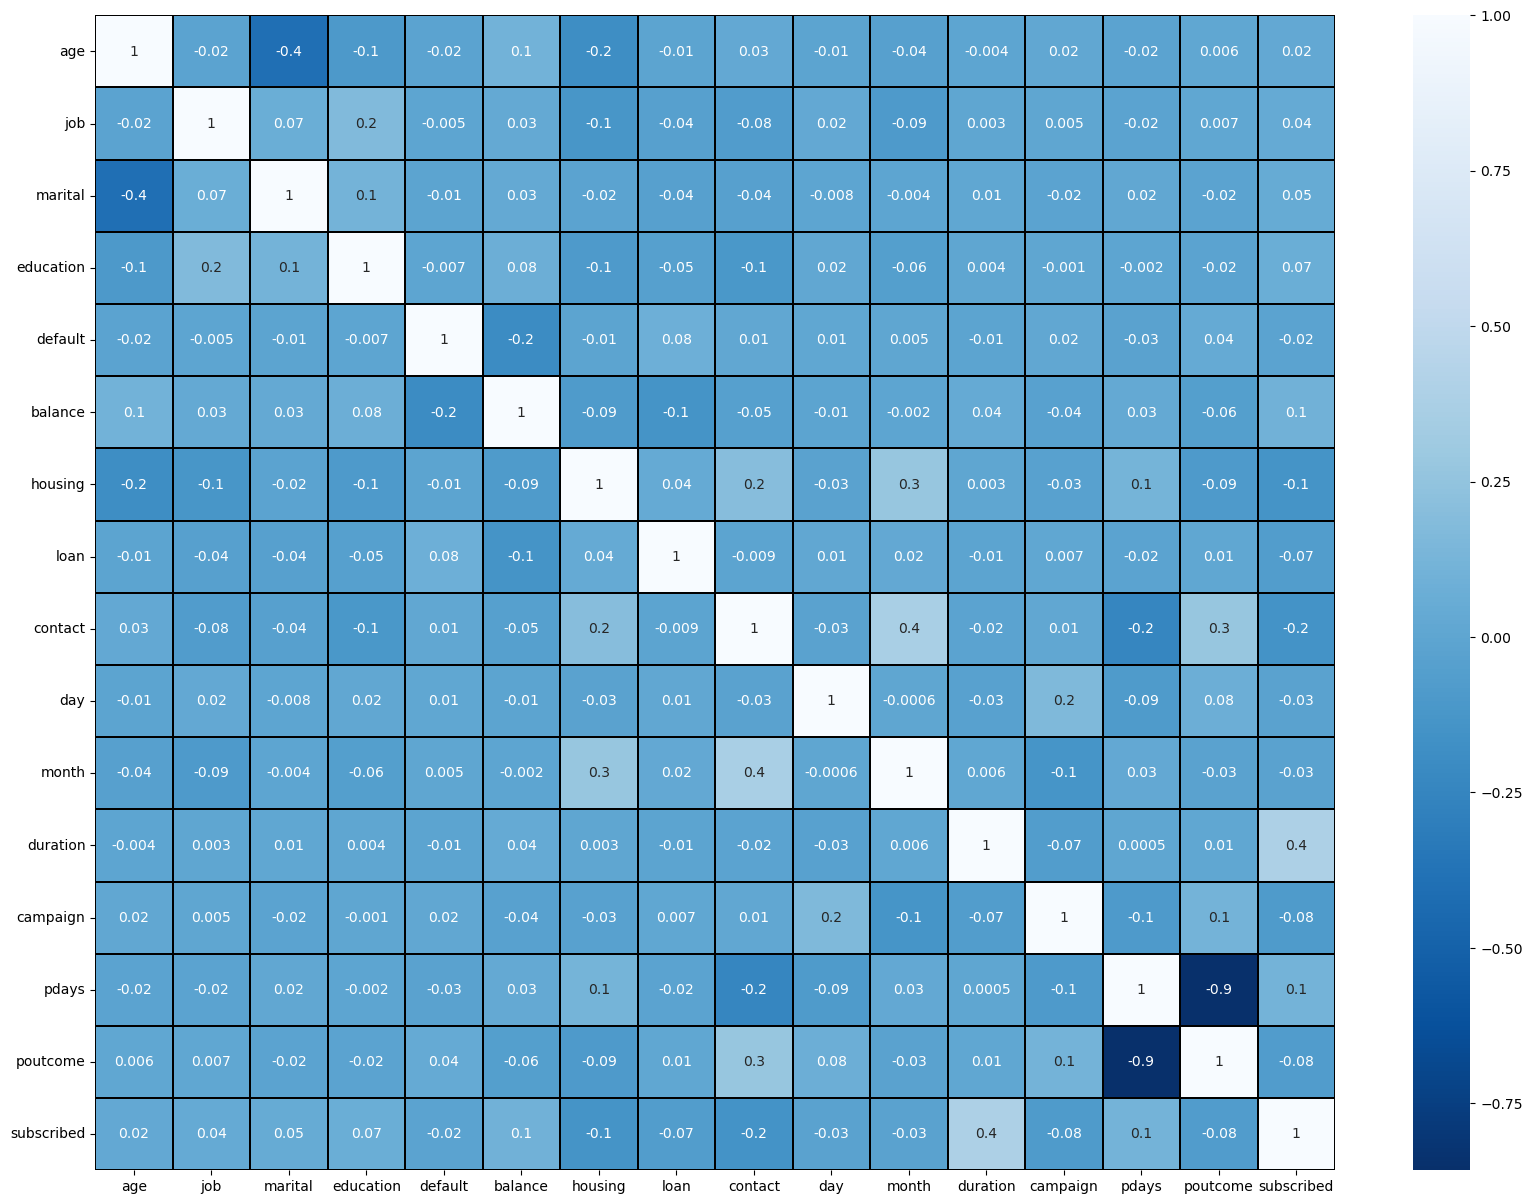

In [42]:
# visualize the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor = 'black',cmap='Blues_r',annot = True)
plt.yticks(rotation=0)
plt.show()


1.duration,pdays features are  positively correlated to subscribing to term deposite.
pdays=number of days that passed by after the client was last contacted.
duration=contact duration.
2.Also balance,education,marital,job,age these features have weak positive correlation with subscribed feature.
3.poutcome,campaign these columns are less likely to subscribe.

In [44]:
# checking for correlation of every feature with target variable
cor['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.389838
pdays         0.108290
balance       0.097107
education     0.066051
marital       0.046043
job           0.038921
age           0.024538
default      -0.020168
month        -0.028088
day          -0.029600
loan         -0.072266
poutcome     -0.080895
campaign     -0.082134
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

# Seperating Feature and label

In [45]:
x = df.drop('subscribed',axis = 1)
y = df['subscribed']

# Feature Scaling using Standard Scalarization

In [46]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.379579,1.154007,-0.832754,-0.127816,-0.408555,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.649957,-0.127816,-0.408555,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.259631,-0.177462,-0.070449,-0.873593,-0.408555,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.368149,-0.873593,0.447299,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.474054,-0.873593,-0.408555,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.552724,-0.127816,-0.408555,0.441777
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.699635,-0.127816,-0.408555,0.441777
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-0.859979,0.395329,-0.408555,0.441777
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.395076,-0.100212,0.821140,-0.918319,1.745828,2.994723,-2.613048


# checking for VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Vif Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,Vif Values,Features
0,1.284612,age
1,1.050479,job
2,1.225023,marital
3,1.067596,education
4,1.045988,default
5,1.092425,balance
6,1.193097,housing
7,1.030512,loan
8,1.321242,contact
9,1.039594,day


In [48]:
# drop column which has high vif value
x.drop('poutcome',axis=1,inplace = True)

In [49]:
vif = pd.DataFrame()
vif['Vif Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,Vif Values,Features
0,1.283401,age
1,1.050292,job
2,1.224926,marital
3,1.066967,education
4,1.045913,default
5,1.090054,balance
6,1.192934,housing
7,1.030172,loan
8,1.298166,contact
9,1.039572,day


In [50]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

As we can see that the data is not balanced,we will balance the data using oversampling method.

# Oversampling

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x,y)


In [52]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

In [53]:
y1.value_counts()

0.0    27932
1.0    27932
Name: subscribed, dtype: int64

# Modeling

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve

from sklearn.model_selection import cross_val_score

In [55]:
 x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=42)

# Classification Algorithm

In [56]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('acc score:',accuracy_score(y_test,predrfc))
print('confusion matrix:',confusion_matrix(y_test,predrfc))
print('classification report:',classification_report(y_test,predrfc))

acc score: 0.9444510739856802
confusion matrix: [[7770  652]
 [ 279 8059]]
classification report:               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      8422
         1.0       0.93      0.97      0.95      8338

    accuracy                           0.94     16760
   macro avg       0.95      0.94      0.94     16760
weighted avg       0.95      0.94      0.94     16760



In [57]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('acc score:',accuracy_score(y_test,predlr))
print('confusion matrix:',confusion_matrix(y_test,predlr))
print('classification report:',classification_report(y_test,predlr))

acc score: 0.8079952267303102
confusion matrix: [[6750 1672]
 [1546 6792]]
classification report:               precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      8422
         1.0       0.80      0.81      0.81      8338

    accuracy                           0.81     16760
   macro avg       0.81      0.81      0.81     16760
weighted avg       0.81      0.81      0.81     16760



In [58]:
gr = GradientBoostingClassifier()
gr.fit(x_train,y_train)
predgr = gr.predict(x_test)
print('acc score:',accuracy_score(y_test,predgr))
print('confusion matrix:',confusion_matrix(y_test,predgr))
print('classification report:',classification_report(y_test,predgr))

acc score: 0.9087112171837709
confusion matrix: [[7422 1000]
 [ 530 7808]]
classification report:               precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      8422
         1.0       0.89      0.94      0.91      8338

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760



In [59]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print('acc score:',accuracy_score(y_test,predad))
print('confusion matrix:',confusion_matrix(y_test,predad))
print('classification report:',classification_report(y_test,predad))

acc score: 0.8747016706443914
confusion matrix: [[7359 1063]
 [1037 7301]]
classification report:               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      8422
         1.0       0.87      0.88      0.87      8338

    accuracy                           0.87     16760
   macro avg       0.87      0.87      0.87     16760
weighted avg       0.87      0.87      0.87     16760



In [60]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print('acc score:',accuracy_score(y_test,predet))
print('confusion matrix:',confusion_matrix(y_test,predet))
print('classification report:',classification_report(y_test,predet))

acc score: 0.9597255369928401
confusion matrix: [[7879  543]
 [ 132 8206]]
classification report:               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      8422
         1.0       0.94      0.98      0.96      8338

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     16760



# Cross Validation Score

In [61]:
score = cross_val_score(rfc,x1,y1, cv=5)
print(score)
print(score.mean())
print('Difference between sccuracy score and cv score:',accuracy_score(y_test,predrfc)-score.mean())

[0.90244339 0.95623378 0.95811331 0.95847131 0.95524526]
0.9461014095633402
Difference between sccuracy score and cv score: -0.0016503355776600337


In [62]:
score = cross_val_score(lr,x1,y1, cv=5)
print(score)
print(score.mean())
print('Difference between sccuracy score and cv score:',accuracy_score(y_test,predlr)-score.mean())

[0.80363376 0.8063188  0.80891435 0.81544795 0.80782313]
0.8084275990893985
Difference between sccuracy score and cv score: -0.00043237235908832883


In [63]:
score = cross_val_score(gr,x1,y1, cv=5)
print(score)
print(score.mean())
print('Difference between sccuracy score and cv score:',accuracy_score(y_test,predgr)-score.mean())

[0.8362123  0.92204421 0.91882216 0.92284973 0.92212675]
0.9044110288507193
Difference between sccuracy score and cv score: 0.004300188333051569


In [65]:
score = cross_val_score(et,x1,y1, cv=5)
print(score)
print(score.mean())
print('Difference between sccuracy score and cv score:',accuracy_score(y_test,predet)-score.mean())

[0.95372774 0.96706346 0.96751096 0.96670545 0.9641067 ]
0.9638228605870456
Difference between sccuracy score and cv score: -0.004097323594205449


In [66]:
score = cross_val_score(ad,x1,y1, cv=5)
print(score)
print(score.mean())
print('Difference between sccuracy score and cv score:',accuracy_score(y_test,predad)-score.mean())

[0.8184015  0.88910767 0.88669113 0.89161371 0.88802363]
0.8747675292872193
Difference between sccuracy score and cv score: -6.585864282793175e-05


AdaBoost classifier is our best model as the difference between accuracy score and cross validation score is least.

# Hyper Parameter Tunning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameters = {'criterion':['gini','entropy'],
             'random_state':[10,50,1000],
             'max_depth':[0,10,20],
             'n_jobs':[-2,-1,1],
             'n_estimators':[50,100,200,300]}

In [79]:
gcv = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [80]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [81]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [83]:
final_model = ExtraTreesClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-2,random_state=1000)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

82.33890214797135


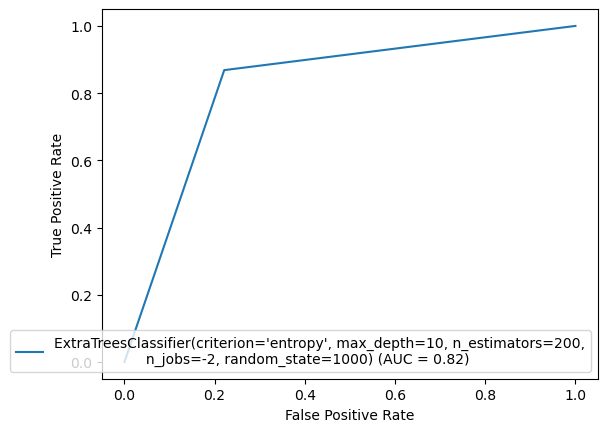

In [85]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
dis = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
dis.plot()

# saving the model

In [86]:
import joblib
joblib.dump(final_model,'BankMarketing.pkl')


['BankMarketing.pkl']

In [87]:
model = joblib.load('BankMarketing.pkl')
pred = model.predict(x_test)
pred

array([1., 1., 1., ..., 1., 1., 1.])

In [88]:
a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = pred
df1['Original'] = a

In [89]:
df1

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
16755,1.0,1.0
16756,0.0,0.0
16757,1.0,1.0
16758,1.0,1.0


==========================================================================